<h3>Why are house prices rising in Idaho? <h5>A Visual Explanation Utilizing Data Gathered from APIs and Web Scraping using Python

The purpose of this jupyter notebook is: 
    1. To demonstrate the acquisition of relevant data through APIs and Web Scraping using Python.
    2. To demonstrate the scrubbing/cleaning of the data using Python's Pandas library.
    3. To represent data visually utilizing matplotlib and pyplot to validate assumptions.

In the code blocks below, you will see the code necessary to pull data from various APIs (Quandl and the Federal Reserve) as well as the code to scrape data from several different web pages (World Population Review and Bureau of Labor Statistics). Additionally, this data will need to be cleaned (removing ',', '%', etc.) and changed to the appropriate data type so further analysis can be done. Lastly, we'll visualize the data using Python's matplotlib library and attempt to determine why home prices in Idaho are rising based on what we see.

In [84]:
#necessary imports for using the requests library for APIs
import requests
import json
import pandas as pd

In [85]:
#Getting Zillow data from Quandl on Idaho Median Listing Price of All Homes
idaho_median_listing_price_response = requests.get("https://www.quandl.com/api/v3/datasets/ZILLOW/S15_MLPAH.json?api_key=yxD7sSsyGf_SKtJ-qcnv")

In [86]:
idaho_median_listing_price_data_json = idaho_median_listing_price_response.json()

In [87]:
print(idaho_median_listing_price_data_json['dataset']['column_names'])

['Date', 'Value']


In [88]:
idaho_median_listing_price_data = pd.DataFrame(idaho_median_listing_price_data_json['dataset']['data'])
idaho_median_listing_price_data.columns = ['Date', 'Idaho Median Listing Price - All Homes']

In [89]:
idaho_median_listing_price_data = idaho_median_listing_price_data.set_index(['Date'])

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
#filter for dates after 2017
import datetime
idaho_median_listing_price_data_filtered = idaho_median_listing_price_data[idaho_median_listing_price_data.index > '2017-01-01']
idaho_median_listing_price_data_sorted = idaho_median_listing_price_data_filtered.sort_index()

In [92]:
#Function for creating line charts that will be used in several of the code blocks going forward: 
def plot_line_chart(x, y, line_color, label, title, y_label):
    plt.style.use('fivethirtyeight')
    fig, ax = plt.subplots(figsize=(25, 8))
    plt.plot(x, y, linewidth = 3.5, linestyle = '--', color = line_color, label = label, marker = 'o', markersize = 10)
    plt.xticks(rotation=45)
    ax.yaxis.grid(True)
    ax.xaxis.grid(False)
    ax.legend(loc='upper center')
    ax.set_title(title)
    ax.set_ylabel(y_label)
    plt.show()

<h3>Zillow Home Value Index (State): Median Listing Price - All Homes - Idaho</h3>

The Zillow Home Value Index is Zillow's estimate of the median market value of all homes within the state of Idaho. This data is calculated by Zillow Real Estate Research (www.zillow.com/research) using their database of 110 million homes. <br> 
<br>As reflected on the chart below, home prices have been steadily rising since October 31, 2017. Median listing prices have increased from $250K in 2017 to over $310K in 2019 - an increase of over $60K. <br><br>

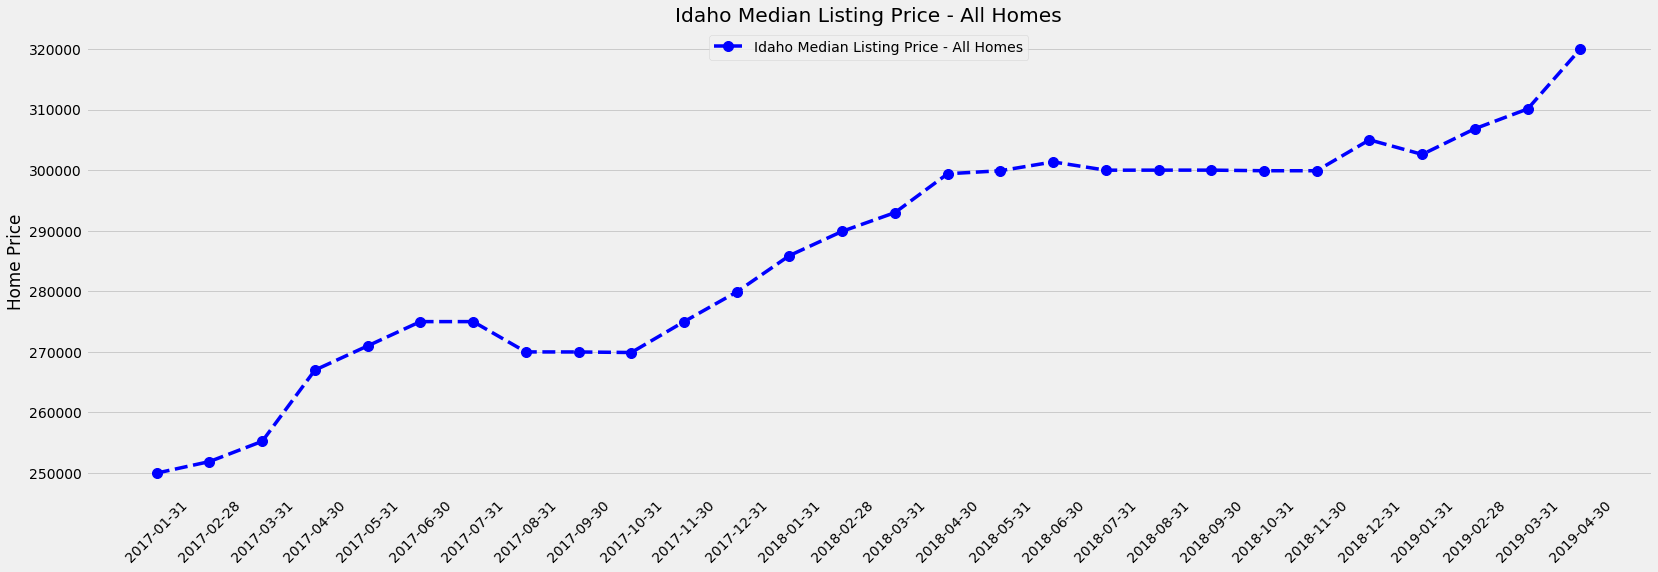

In [93]:
plot_line_chart(idaho_median_listing_price_data_sorted.index,
         idaho_median_listing_price_data_sorted.loc[:,"Idaho Median Listing Price - All Homes"], 'blue',
               'Idaho Median Listing Price - All Homes', 'Idaho Median Listing Price - All Homes', 'Home Price')

<br>Similarly, rental prices in Idaho are increasing dramatically. According to the most recent US Census Data for Idaho (https://www.census.gov/quickfacts/id), the average family size is 2.67 people per family. Based on this, let's assume that either two- or three-bedroom homes would be a good indicator for the market. Below is a chart for:
<h3>Zillow Home Value Index (State): Median Rental Price - Three Bedrooms - Idaho

In [94]:
idaho_median_rental_price_response = requests.get("https://www.quandl.com/api/v3/datasets/ZILLOW/S15_MRP3B.json?api_key=yxD7sSsyGf_SKtJ-qcnv")
idaho_median_rental_price_data_json = idaho_median_rental_price_response.json()
idaho_median_rental_price_data = pd.DataFrame(idaho_median_rental_price_data_json['dataset']['data'])
idaho_median_rental_price_data.columns = ['Date', 'Idaho Median Rental Price - 3 Bedrooms']
idaho_median_rental_price_data = idaho_median_rental_price_data.set_index(['Date'])
idaho_median_rental_price_data_filtered = idaho_median_rental_price_data[idaho_median_rental_price_data.index > '2017-01-01']
idaho_median_rental_price_data_sorted = idaho_median_rental_price_data_filtered.sort_index()

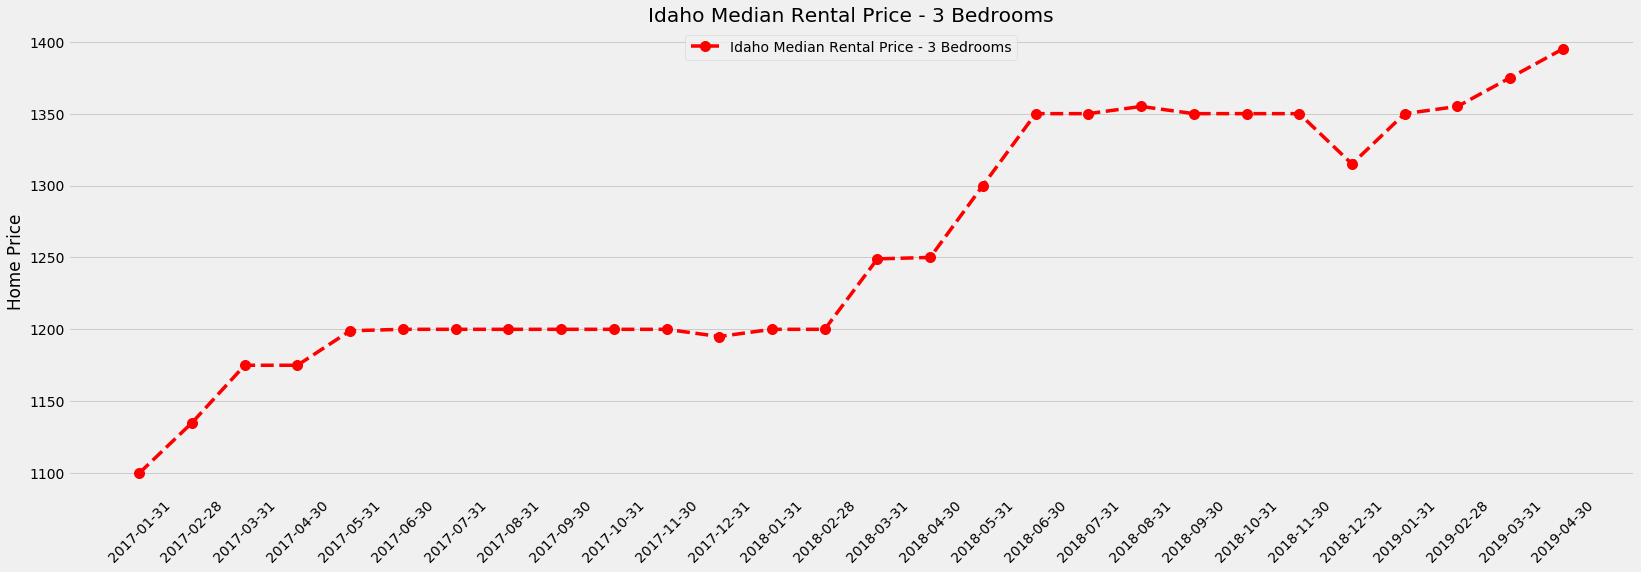

In [95]:
plot_line_chart(idaho_median_rental_price_data_sorted.index,
         idaho_median_rental_price_data_sorted.loc[:,"Idaho Median Rental Price - 3 Bedrooms"], 'red',
                'Idaho Median Rental Price - 3 Bedrooms', 'Idaho Median Rental Price - 3 Bedrooms',
               'Home Price')

Unlike home listing prices above, which began increasing in October 2017, it appears that rental prices in Idaho didn't start increasing until February 2018. This delay is expected because rental prices are driven from housing market conditions, and it takes several months for a change in the housing market conditions to ripple through to the rental market. From January of 2017 through 2019, rental prices for a three-bedroom homes have risen $250 per month.  

*This begs the question...why the increase in prices?*<br>
<br>
An increase in the population of Idaho would generate greater demand for housing and without an adequate inventory of houses to fill this demand, home prices would increase. Let's scrape some data from the web to validate this assumption. We'll use BeautifulSoup to scrape this data from the web.<br><br>

In [96]:
#World Population Review - Idaho Population
website_url = requests.get('http://worldpopulationreview.com/states/idaho-population/').text

In [97]:
#extracting labels from table on world population review website

from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')
table = soup.find('table', {'class':'table table-striped'})
data_labels = []
for header_label in table.find_all('a'):
    label = header_label.get('data-field')
    data_labels.append(label)
    
print(data_labels)

['Year', 'Pop', 'GrowthRate']


In [98]:
#moving down a level to get the column data from the table
table_bod = table.tbody

data_table = []
for data in table_bod.find_all('tr'):
    inner_data = []
    for tr in data.find_all('td'):
        d = tr.get_text()
        inner_data.append(d)
    data_table.append(inner_data)
population_data = pd.DataFrame(data_table, columns=data_labels)
pop_data = population_data.sort_values('Year')
pop_data.head()

,Year,Pop,GrowthRate
24,1870,"14,999",0.00%
23,1880,"32,610",8.08%
22,1890,"88,548",10.51%
21,1900,"161,772",6.21%
20,1910,"325,594",7.25%


In [99]:
#need to do a little data cleaning to remove the ',' sign from Pop column and '%' sign from the GrowthRate column
pop_data['Pop'].replace(',','', regex = True, inplace = True)
pop_data['GrowthRate'].replace('%','', regex=True, inplace = True)
pop_data.head()

,Year,Pop,GrowthRate
24,1870,14999,0.00
23,1880,32610,8.08
22,1890,88548,10.51
21,1900,161772,6.21
20,1910,325594,7.25


Now let's take a look at the data types. We want 'Year' to be an int, and the other two columns to be floats: 

In [100]:
pop_data.dtypes

Year          object
Pop           object
GrowthRate    object
dtype: object

In [101]:
#changing data types
pop_data.loc[:,'Year'] = pop_data.loc[:,'Year'].astype(int)
pop_data.loc[:,'Pop'] = pop_data.loc[:,'Pop'].astype(float)
pop_data.loc[:,'GrowthRate'] = pop_data.loc[:,'GrowthRate'].astype(float)
pop_data.dtypes

Year            int64
Pop           float64
GrowthRate    float64
dtype: object

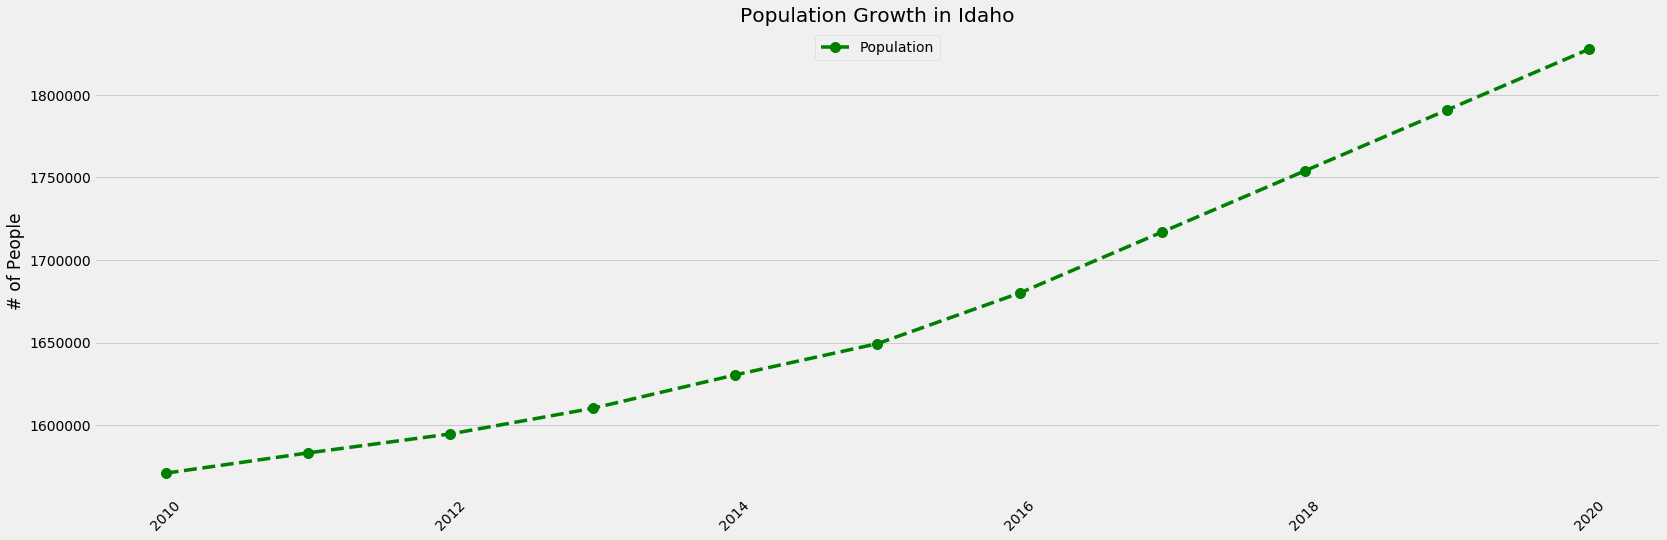

In [102]:
#Creating chart to visualize population growth - using 2010 to show larger date range as 2017 only provides two years since data is yearly
pop_data_filt = pop_data.loc[pop_data.loc[:,'Year']>=2010]

plot_line_chart(pop_data_filt.loc[:,'Year'], pop_data_filt.loc[:,'Pop'],'green', 'Population',
                'Population Growth in Idaho','# of People')

Let's also visualize the population growth percentage over the last several years. 

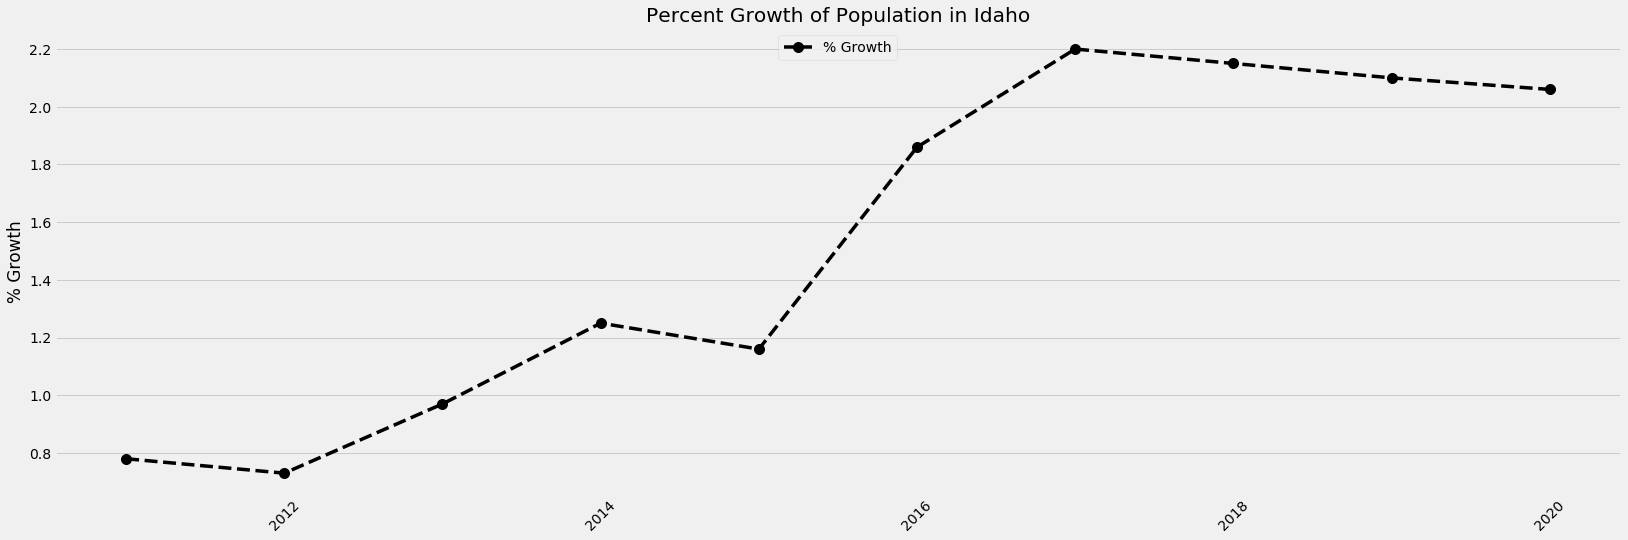

In [103]:
pop_data_filtered = pop_data.loc[pop_data.loc[:,'Year']>2010] #using 2010 to show larger date range as 2017 only provides two years since data is yearly

plot_line_chart(pop_data_filtered.loc[:,'Year'], pop_data_filtered.loc[:,'GrowthRate'],'black',
               '% Growth','Percent Growth of Population in Idaho', '% Growth')

The data in the two graphs above confirms that Idaho's population is steadily growing. The growth percentage graph shows Idaho has had a positive growth percentage for the last several years. <br></br>
<br></br>Now that we've determined that population is growing, let's determine why. A state's population growth often corresponds with the expansion of its economy. When a state's economy is doing well, businesses grow and prosper, prompting them to hire more people to fill positions. Another factor contributing to population growth is that people in states with a high cost of living, like California and Washington, want to move to states with lower cost of living, like Idaho. To check this hypothesis, lets look at the GDP for Idaho leveraging the Federal Reserve Economic Data utilizing their API. 

In [104]:
from fredapi import Fred
fred = Fred(api_key='22826b2fadaba44f45860c6c1ae5be21')
data = fred.get_series('IDNGSP')
#print(data)
econ_df = pd.DataFrame(data)
econ_df.index.name = 'Date'
econ_df.index = pd.to_datetime(econ_df.index)
econ_df.columns = ['Total GDP']
econ_df.head()

,Total GDP
Date,
1997-01-01,29439.0
1998-01-01,30983.9
1999-01-01,34138.2
2000-01-01,37992.8
2001-01-01,37384.1


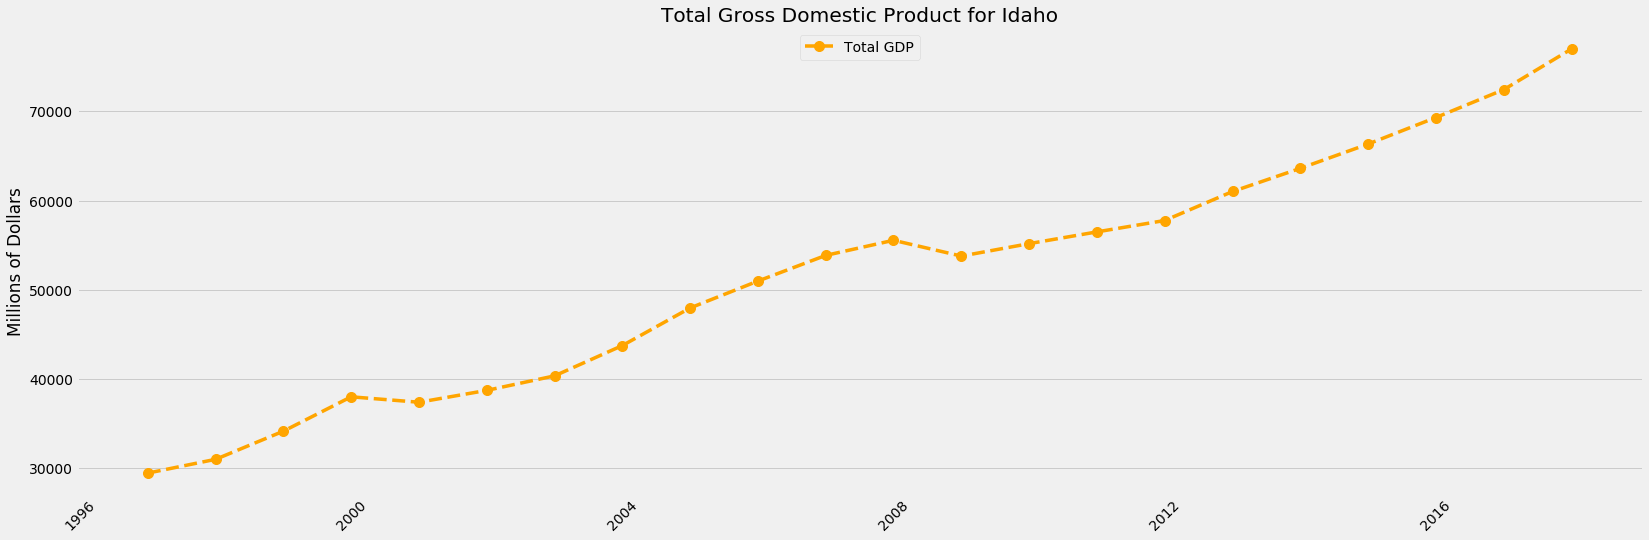

In [105]:
plot_line_chart(econ_df.index, econ_df.loc[:,'Total GDP'], 'orange', 'Total GDP', 
                'Total Gross Domestic Product for Idaho','Millions of Dollars')

The data above indicates that the economy of Idaho is, in-fact, growing, and as mentioned above, economic expansion in the economy often leads to a need to hire more people. Let's look at some data from the Bureau of Labor Statistics to see if our hypothesis is correct - that the employment level has increased. We'll use web scraping once again to get this data. 

In [106]:
bls_url = requests.get('https://data.bls.gov/timeseries/LASST160000000000005?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true').text

In [107]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(bls_url,'html5lib')
my_table = soup.find('thead')
row_headers = []
for header in my_table.find_all('tr'):
    for text in header.find_all('th'):
        row_headers.append(text.get_text())

#column headers have leading/trailing spaces, need to remove
new_headers = []
for text in row_headers: 
    change_to_string = str(text)
    removed_spaces = change_to_string.strip()
    new_headers.append(removed_spaces)
        
table_body = soup.find_all('tbody')[1]       
final_list = []
for table_row in table_body.find_all('tr'):
    data_points = []
    for data_point in table_row.find_all(['th', 'td']):
        data_points.append(data_point.get_text())
    final_list.append(data_points)
employment_data = pd.DataFrame(final_list, columns=new_headers)
employment_data.tail()

,Year,Period,labor force,employment,unemployment,unemployment rate
119,2018,Dec,862394(B),838636(B),23758(B),2.8(B)
120,2019,Jan,864415,840044,24371,2.8
121,2019,Feb,866526,841749,24777,2.9
122,2019,Mar,868200,843283,24917,2.9
123,2019,Apr,869968(P),845285(P),24683(P),2.8(P)


In [108]:
#cleaning the scraped data
need_cleaning = ['labor force', 'employment', 'unemployment', 'unemployment rate']
symbols_to_remove = ['\(','\)', 'B', 'P' ]

#function to loop through columns and clean them
def clean_column(data, column, to_remove):
    for column in need_cleaning:
        for symbol in symbols_to_remove:
            employment_data[column].replace(symbol, '', regex = True, inplace = True)
            
    
    
#employment_data['labor force'].replace('\(','', regex = True, inplace = True)
employment_data.pipe(clean_column, need_cleaning, symbols_to_remove)
employment_data.tail()

,Year,Period,labor force,employment,unemployment,unemployment rate
119,2018,Dec,862394,838636,23758,2.8
120,2019,Jan,864415,840044,24371,2.8
121,2019,Feb,866526,841749,24777,2.9
122,2019,Mar,868200,843283,24917,2.9
123,2019,Apr,869968,845285,24683,2.8


In [109]:
#Now to check datatypes
employment_data.dtypes

Year                 object
Period               object
labor force          object
employment           object
unemployment         object
unemployment rate    object
dtype: object

In [110]:
#changing data types from object
employment_data.loc[:,'Year'] = employment_data.loc[:,'Year'].astype(str)
employment_data['Period'] = employment_data['Period'].astype(str)
employment_data['labor force'] = employment_data['labor force'].astype(float)
employment_data['employment'] = employment_data['employment'].astype(float)
employment_data['labor force'] = employment_data['labor force'].astype(float)
employment_data['unemployment'] = employment_data['unemployment'].astype(float)
employment_data['unemployment rate'] = employment_data['unemployment rate'].astype(float)

employment_data.dtypes

Year                  object
Period                object
labor force          float64
employment           float64
unemployment         float64
unemployment rate    float64
dtype: object

In [111]:
#create new column for date_time for chart
employment_data['full_date'] = employment_data['Period'] + ' 1, ' + employment_data.loc[:,'Year'] 
employment_data.tail()

,Year,Period,labor force,employment,unemployment,unemployment rate,full_date
119,2018,Dec,862394.0,838636.0,23758.0,2.8,"Dec 1, 2018"
120,2019,Jan,864415.0,840044.0,24371.0,2.8,"Jan 1, 2019"
121,2019,Feb,866526.0,841749.0,24777.0,2.9,"Feb 1, 2019"
122,2019,Mar,868200.0,843283.0,24917.0,2.9,"Mar 1, 2019"
123,2019,Apr,869968.0,845285.0,24683.0,2.8,"Apr 1, 2019"


In [112]:
#change full_date to datetime
employment_data['full_date'] = pd.to_datetime(employment_data['full_date'])
employment_data.dtypes

Year                         object
Period                       object
labor force                 float64
employment                  float64
unemployment                float64
unemployment rate           float64
full_date            datetime64[ns]
dtype: object

In [113]:
employment_data.tail()

,Year,Period,labor force,employment,unemployment,unemployment rate,full_date
119,2018,Dec,862394.0,838636.0,23758.0,2.8,2018-12-01
120,2019,Jan,864415.0,840044.0,24371.0,2.8,2019-01-01
121,2019,Feb,866526.0,841749.0,24777.0,2.9,2019-02-01
122,2019,Mar,868200.0,843283.0,24917.0,2.9,2019-03-01
123,2019,Apr,869968.0,845285.0,24683.0,2.8,2019-04-01


<h3>Labor Force and Employment Rising in Idaho</h3>

Text(0,0.5,'# of People')

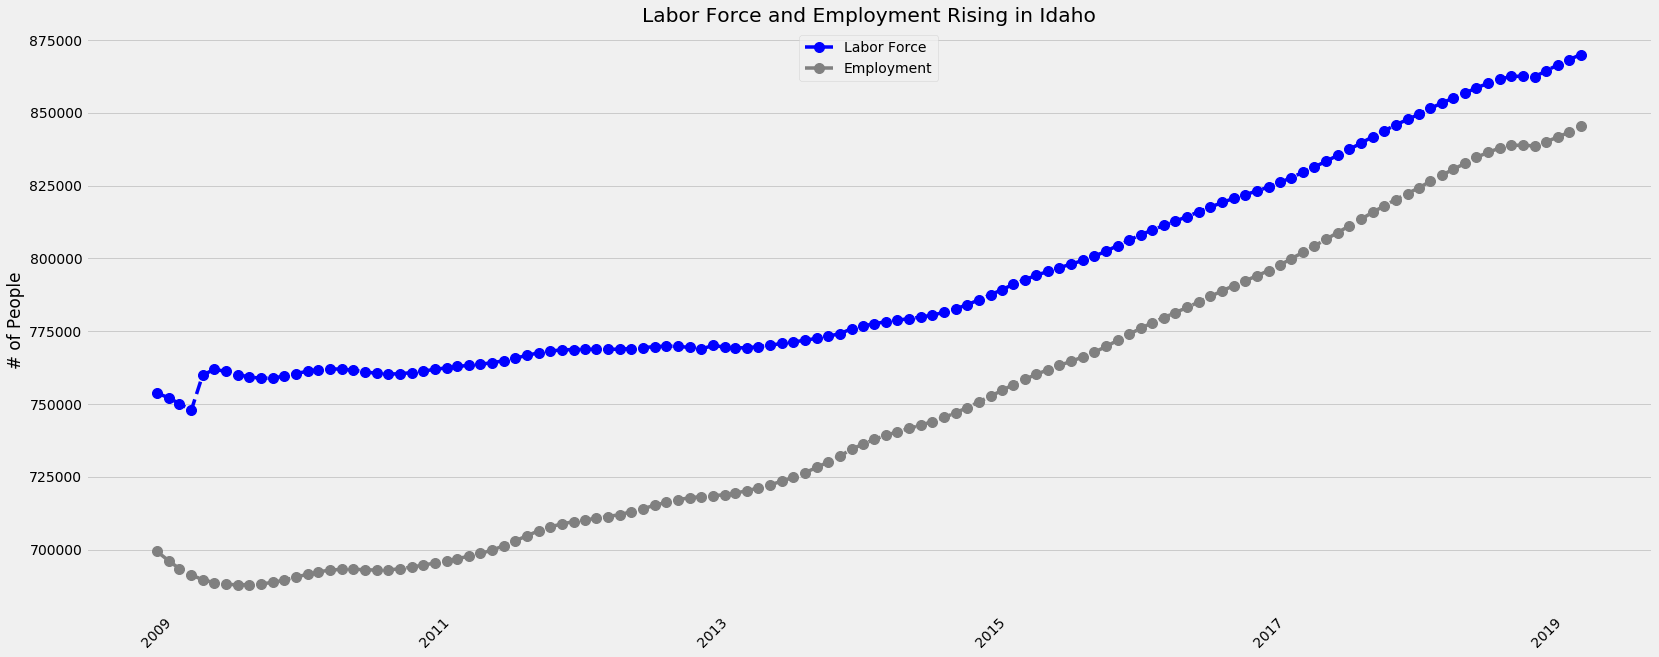

In [114]:
filtered_employment_data = employment_data[employment_data['full_date']>= '2010-01-01']

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(25, 10))
plt.plot(employment_data.loc[:,'full_date'], employment_data['labor force'],
linewidth = 3.5, linestyle = '--', color='blue', label = 'Labor Force', 
         marker = 'o', markersize = 10)
plt.plot(employment_data.loc[:,'full_date'], employment_data['employment'],
linewidth = 3.5, linestyle = '--', color='gray', label = 'Employment', 
         marker = 'o', markersize = 10)
plt.xticks(rotation=45)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
ax.legend(loc='upper center')
ax.set_title('Labor Force and Employment Rising in Idaho')
ax.set_ylabel('# of People')

This data demonstrates that people are moving to Idaho. The strong economy is providing more employment opportunities, and people are migrating here from higher-priced cities because it’s more affordable. These factors, in addition to rising rent prices and low vacancy rates are enticing more families to buy a home, especially millennials.

The increase in population, coupled with the low supply of homes, makes for a competitive market. 

There are obviously a lot of additional questions we can ask and additional research we can do, for example: 
1. Where in Idaho is this growth happening? Is it localized to a few cities? 
2. Can we validate our correlation assumptions by doing further statistical research? (looking at the correlation between our assumptions and housing prices)
3. Can we build a predictive model to estimate future home prices?

Perhaps I'll explore these in a future notebook. Thanks for taking a look!